In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [43]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [44]:
# Step 1 Add overweight column

df['overweight'] = np.where((df['weight'] / ((df['height'] / 100) ** 2)) > 25,1,0)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [45]:
# Step 2 normalize
mask = df['cholesterol'] == 1
df.loc[mask, 'cholesterol'] = 0

mask2 = df['cholesterol'] > 1
df.loc[mask2, 'cholesterol'] = 1

mask3 = df['gluc'] == 1
df.loc[mask3, 'gluc'] = 0

mask4 = df['gluc'] > 1
df.loc[mask4, 'gluc'] = 1

df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [46]:
def draw_cat_plot():
    df_cat = pd.melt(df,('cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'))
    #df_cat = None
    fig = sns.catplot()
    fig.savefig('catplot.png')
    return fig

In [121]:
#draw_cat_plot(df)
df_cat = pd.melt(df,'cardio',('cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'))
#mask = df_cat['variable'] == 'cardio'
#df_cat2 = df_cat[mask]
#df_cat2 = df_cat.groupby(['cardio','variable','value']).count('value')
df_cat2 = df_cat.reset_index().set_axis(['index','cardio','variable','value'], axis = 'columns')
df_cat2

,index,cardio,variable,value
0,0,0,cholesterol,0
1,1,1,cholesterol,1
2,2,1,cholesterol,1
3,3,1,cholesterol,0
4,4,0,cholesterol,0
...,...,...,...,...
419995,419995,0,overweight,1
419996,419996,1,overweight,1
419997,419997,1,overweight,1
419998,419998,1,overweight,1


In [71]:
df_cat['total'] = 1
df_cat2 = df_cat.groupby(['cardio','variable','value']).sum()
df_cat2

total
cardio variable    value       
0      active      0       6378
                   1      28643
       alco        0      33080
                   1       1941
       cholesterol 0      29330
                   1       5691
       gluc        0      30894
                   1       4127
       overweight  0      15915
                   1      19106
       smoke       0      31781
                   1       3240
1      active      0       7361
                   1      27618
       alco        0      33156
                   1       1823
       cholesterol 0      23055
                   1      11924
       gluc        0      28585
                   1       6394
       overweight  0      10539
                   1      24440
       smoke       0      32050
                   1       2929

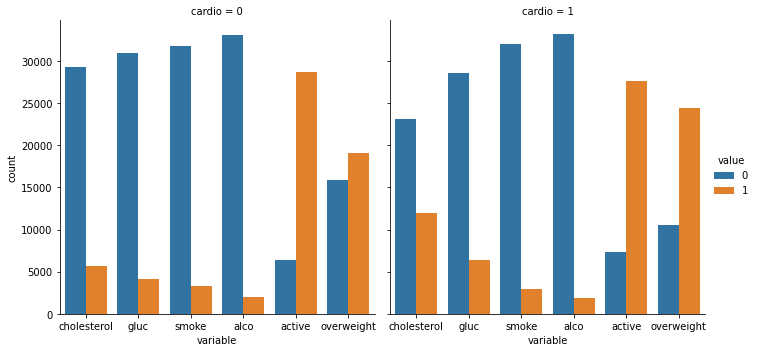

In [64]:
fig = sns.catplot(data = df_cat, kind = 'count', x = 'variable', hue = 'value', col = 'cardio')

In [76]:
# clean data
mask2 = (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['ap_lo'] <= df['ap_hi']) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))
df_clean = df[mask2]

df_clean.shape


(63259, 14)

In [116]:
dfCor = df_clean.corr().round(1)
dfCor

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
age,0.0,1.0,-0.0,-0.1,0.1,0.0,0.2,0.1,0.1,-0.0,-0.0,-0.0,0.2,0.1
sex,0.0,-0.0,1.0,0.5,0.1,0.0,0.1,-0.0,-0.0,0.3,0.2,0.0,0.0,-0.1
height,0.0,-0.1,0.5,1.0,0.3,0.0,0.0,-0.1,-0.0,0.2,0.1,-0.0,-0.0,-0.1
weight,0.0,0.1,0.1,0.3,1.0,0.0,0.2,0.1,0.1,0.1,0.1,-0.0,0.2,0.7
ap_hi,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,0.0,-0.0,0.0,-0.0,0.1,0.0
ap_lo,0.0,0.2,0.1,0.0,0.2,0.1,1.0,0.2,0.1,0.0,0.0,0.0,0.3,0.2
cholesterol,0.0,0.1,-0.0,-0.1,0.1,0.0,0.2,1.0,0.4,0.0,0.0,0.0,0.2,0.1
gluc,0.0,0.1,-0.0,-0.0,0.1,0.0,0.1,0.4,1.0,-0.0,0.0,-0.0,0.1,0.1
smoke,-0.0,-0.0,0.3,0.2,0.1,-0.0,0.0,0.0,-0.0,1.0,0.3,0.0,-0.0,-0.0


<AxesSubplot:>

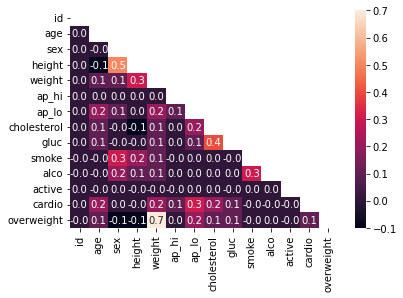

In [117]:
mask = np.triu(np.ones_like(dfCor))


sns.heatmap(dfCor, annot = True, fmt = '.1f', mask = mask)


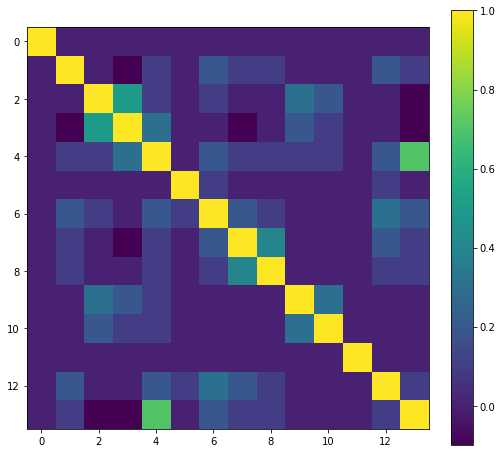

In [90]:
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(dfCor, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)
